Check running TensorFlow version

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

# MNIST character predication

The MNIST database of handwritten digits, available from [this page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

I will build a small neural network to solve this problem

In [2]:
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

import random as rand

import numpy as np

## Load MNIST and get familiar with it

In [3]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [5]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

Plot a few random images from the dataset

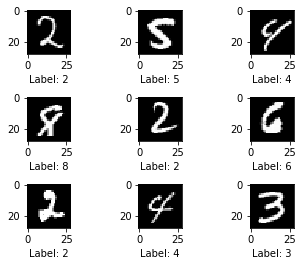

In [6]:
rows = 3
cols = 3
random_indecies = rand.sample(list(range(train_x.shape[0])), rows * cols)

plt.subplots_adjust(wspace=0, hspace=1)
for i, index in enumerate(random_indecies, 1):
    plt.subplot(rows, cols, i)
    plt.imshow(train_x[index], cmap='gray')
    plt.xlabel(f"Label: {train_y[index]}")

Scale x train and test to be between 0 and 1

In [7]:
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

Change the input dimension because Conv2D expects a 3 dimensions input (4 dimension including the batch)

In [20]:
train_x = train_x.reshape(train_x.shape + (1,))
test_x = test_x.reshape(test_x.shape + (1,))

In [21]:
train_x.shape

(60000, 28, 28, 1)

## Encode y as one hot encoding

In [8]:
number_of_classes = len(np.unique(train_y))
number_of_classes

10

In [9]:
train_y = to_categorical(train_y, number_of_classes)
test_y = to_categorical(test_y, number_of_classes)

In [10]:
train_y.shape, train_y[0]

((60000, 10), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

## Train

In [22]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=train_x.shape[1:]))
model.add(layers.MaxPool2D((2, 2)))  # Half the size

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3)))

model.add(layers.Flatten(input_shape=train_x.shape[1:]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x=train_x, y=train_y, validation_split=0.2, shuffle=True, batch_size=128, epochs=10)
history.history.keys()

W0814 16:15:26.630897 4437059008 deprecation.py:323] From /Users/mostafagazar/anaconda3/envs/py3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s 354us/sample - loss: 0.2203 - accuracy: 0.9306 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 2/10
48000/48000 [==============================] - 16s 343us/sample - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0602 - val_accuracy: 0.9827
Epoch 3/10
48000/48000 [==============================] - 16s 334us/sample - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0446 - val_accuracy: 0.9862
Epoch 4/10
48000/48000 [==============================] - 16s 341us/sample - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0414 - val_accuracy: 0.9878
Epoch 5/10
48000/48000 [==============================] - 16s 335us/sample - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0534 - val_accuracy: 0.9852
Epoch 6/10
48000/48000 [==============================] - 16s 344us/sample - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.0532 - val_accuracy: 0.9868
Epoch 7/10
48000/48000 [====================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

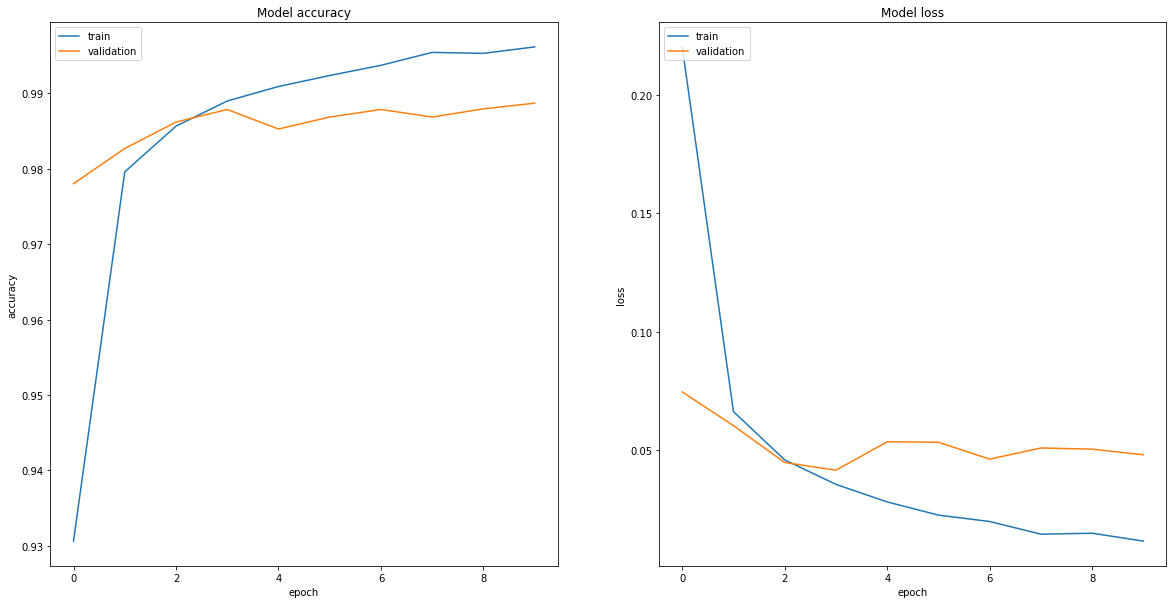

In [25]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

## Evaluate

In [26]:
loss, accuracy = model.evaluate(x=test_x, y=test_y)
loss, accuracy

10000/10000 [==============================] - 1s 78us/sample - loss: 0.0420 - accuracy: 0.9903


(0.04204526386874427, 0.9903)

## Predict on one image

In [27]:
model.trainable = False

# Compile model so changes to trainable would take effect
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
test_index = 1

test_image = test_x[test_index]
test_image.shape

(28, 28, 1)

In [44]:
test_batch = test_image.reshape((1,) + test_image.shape)
test_batch.shape

(1, 28, 28, 1)

In [45]:
softmax = model.predict(test_batch)
softmax

array([[1.7008514e-13, 1.8273707e-12, 1.0000000e+00, 1.3846791e-18,
        1.3141266e-19, 1.9818644e-19, 7.9970286e-17, 2.7095103e-17,
        1.5954834e-18, 4.7084290e-23]], dtype=float32)

In [46]:
np.argmax(softmax)

2

In [47]:
np.argmax(test_y[test_index])

2

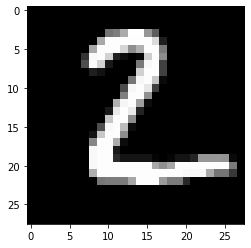

In [48]:
plt.imshow(test_image.reshape(test_image.shape[:2]), cmap='gray')